In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('Datasets/Rainfall-Dataset.csv')
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Austin,1/1/19,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,...,4.0,2,NaN,2019-01-01T07:27:35,2019-01-01T17:41:36,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
1,Austin,1/2/19,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,...,0.7,0,NaN,2019-01-02T07:27:48,2019-01-02T17:42:19,0.88,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
2,Austin,1/3/19,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,...,7.6,5,NaN,2019-01-03T07:28:00,2019-01-03T17:43:03,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
3,Austin,1/4/19,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,...,12.4,6,NaN,2019-01-04T07:28:10,2019-01-04T17:43:48,0.95,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
4,Austin,1/5/19,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,...,12.7,6,NaN,2019-01-05T07:28:19,2019-01-05T17:44:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."


In [3]:
data.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,...,1664.000000,1664.000000,1664.000000,1664.000000,1664.00000,1664.000000,1664.000000,1664.000000,559.000000,1664.000000
mean,80.871094,60.095012,69.791827,82.424700,59.345012,70.424519,55.555168,64.579567,0.084632,28.245192,...,11.753425,155.483954,1015.985096,43.380048,9.27530,174.142488,15.027163,6.512019,39.409660,0.481358
std,15.074327,14.748907,14.351736,17.125754,16.120580,16.284259,15.161742,13.449047,0.304253,45.032733,...,3.782494,95.390825,5.979587,30.028990,1.10608,77.842223,6.722887,2.404866,32.600965,0.289650
min,22.600000,8.200000,15.700000,12.800000,-7.100000,4.000000,-0.700000,18.400000,0.000000,0.000000,...,3.400000,0.100000,1000.300000,0.000000,2.50000,8.500000,0.700000,0.000000,10.000000,0.000000
25%,71.500000,47.900000,58.900000,71.500000,46.200000,58.775000,44.175000,56.100000,0.000000,0.000000,...,9.000000,88.275000,1012.000000,16.700000,9.10000,114.350000,9.900000,5.000000,10.000000,0.240000
50%,82.500000,62.950000,71.900000,83.000000,62.950000,71.850000,60.650000,65.100000,0.000000,0.000000,...,11.400000,163.250000,1014.800000,39.850000,9.80000,181.100000,15.700000,7.000000,30.000000,0.490000
75%,92.800000,73.700000,82.300000,97.525000,73.700000,84.300000,68.600000,73.625000,0.004000,100.000000,...,14.100000,185.400000,1019.500000,67.450000,9.90000,240.100000,20.700000,8.000000,75.000000,0.750000
max,107.900000,82.900000,92.300000,117.000000,90.700000,99.300000,76.500000,97.900000,3.369000,100.000000,...,28.600000,359.900000,1040.100000,100.000000,9.90000,346.100000,29.800000,10.000000,100.000000,0.980000


In [4]:
data.shape

(1664, 33)

In [5]:
data.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1023
snow                   0
snowdepth              0
windgust             211
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          1105
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [7]:
data['preciptype'].fillna(data['preciptype'].mode()[0])
data['windgust'].fillna(data['windgust'].median())
data['severerisk'].fillna(data['severerisk'].mode()[0])

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
1659    30.0
1660    60.0
1661    60.0
1662    30.0
1663    30.0
Name: severerisk, Length: 1664, dtype: float64

In [8]:
data.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [6]:
data.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [9]:
data['datetime'] = pd.to_datetime(data['datetime'], format='mixed', dayfirst=False)
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data.drop(columns=['datetime'], inplace=True)

In [10]:
data.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,day
0,Austin,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,0.001,...,2019-01-01T07:27:35,2019-01-01T17:41:36,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7...",2019,1,1
1,Austin,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,2.275,...,2019-01-02T07:27:48,2019-01-02T17:42:19,0.88,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7...",2019,1,2
2,Austin,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,0.242,...,2019-01-03T07:28:00,2019-01-03T17:43:03,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7...",2019,1,3
3,Austin,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,0.000,...,2019-01-04T07:28:10,2019-01-04T17:43:48,0.95,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7...",2019,1,4
4,Austin,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,0.000,...,2019-01-05T07:28:19,2019-01-05T17:44:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7...",2019,1,5


In [11]:
data.drop(columns=['name','sunrise','sunset','description','icon','stations'], inplace=True)

In [12]:
data.drop(columns=['conditions'], inplace=True)

In [13]:
if 'preciptype' in data.columns:
    data = pd.get_dummies(data, columns=['preciptype'], drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = data.drop(columns=['precip']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[numerical_cols], data['precip'], test_size=0.2, random_state=42)

In [16]:
print(X_train.shape, X_test.shape)

(1331, 32) (333, 32)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
m = model.coef_
b = model.intercept_

In [19]:
print(m)
print(b)

[-0.09139487 -0.15570404  0.20878476  0.1156072   0.15594303 -0.28508299
  0.06378527 -0.00960311 -0.04040071  0.27106699  0.04980942  0.01689355
  0.05236214 -0.02512649  0.00741197 -0.00911449 -0.0155427   0.02706047
  0.59096553 -0.61090385  0.03194512 -0.00579276  0.01108768  0.00066734
  0.00157343 -0.00397927  0.00251836 -0.0024028  -0.02654611 -0.00573596
  0.00136003 -0.03946811]
0.09222486535135269


In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(r2)

0.03826273872782002
0.09827767576570845
0.35869345488162474


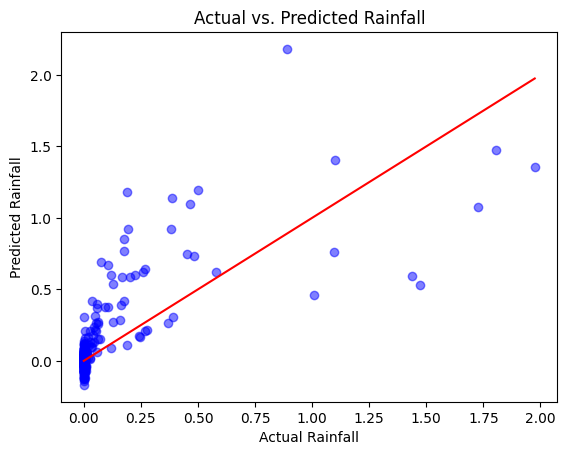

In [21]:

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs. Predicted Rainfall")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line
plt.show()
